In [52]:
# Item Response dat of sample sizes I=500 or 2000 were drawn from discretized multivariate normal distribution with 0 mean and sigma sd.
# sigma has unit variance and correlation of rho = 0.3 or 0.6
# J = 20 or 40 
# item parameters = uniform (0,0.3)
sigma <- matrix(rep(0.3, times=25), ncol=5)
diag(sigma) <- 1
QMat <- read.csv("q.csv")
guess <- rep(0.3, nrow(QMat));

In [53]:
simdat <- CDM::sim.din(N=1000,
QMat,
guess = guess,
slip = guess,
Sigma=sigma, rule="DINA")

In [54]:
library(GDINA);
library(bnlearn);
library(Rgraphviz);

In [55]:
## This block needs some fixing 
fulldat <- cbind(simdat$dat, simdat$alpha)
colnames(fulldat)<- c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20",
                    "a1", "a2","a3","a4","a5")
#fulldat[, colnames(fulldat)] = lapply(fulldat[, colnames(fulldat)], as.factor)
fdf <- as.data.frame(fulldat)
factoreddata <- data.frame(lapply(fdf, factor))
factoreddata

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x16,x17,x18,x19,x20,a1,a2,a3,a4,a5
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,0,1,0,0,1,1,1,0,1,⋯,1,1,1,1,0,1,1,1,1,1
1,1,1,0,0,0,0,0,0,1,⋯,1,0,1,0,0,0,1,1,0,0
1,1,1,0,1,0,0,1,1,0,⋯,1,1,0,1,1,1,0,1,1,1
1,0,1,0,1,0,1,0,0,0,⋯,0,0,1,1,0,0,1,1,0,1
1,1,0,1,0,1,0,1,1,1,⋯,0,0,0,1,0,1,1,1,1,0
0,0,1,0,0,0,1,1,0,0,⋯,1,1,1,1,1,1,1,1,1,0
1,1,1,0,1,0,1,0,1,0,⋯,1,0,0,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,0,1,⋯,0,1,1,1,1,1,1,0,1,1
0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,1,1,0,0,1


In [56]:
a = empty.graph(c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20",
                    "a1", "a2", "a3", "a4", "a5"))

In [57]:
adjMatrix <- as.matrix(read.csv("newadj.csv"))
row.names(adjMatrix) <- c("a1", "a2", "a3", "a4", "a5",
                    "x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20")


colnames(adjMatrix)<- c("a1", "a2", "a3", "a4", "a5",
                    "x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20")

amat(a) <- adjMatrix

Warning message in check.amat(amat = value, nodes = names(x$nodes)):
“rearranging the rows/columns of the adjacency matrix.”


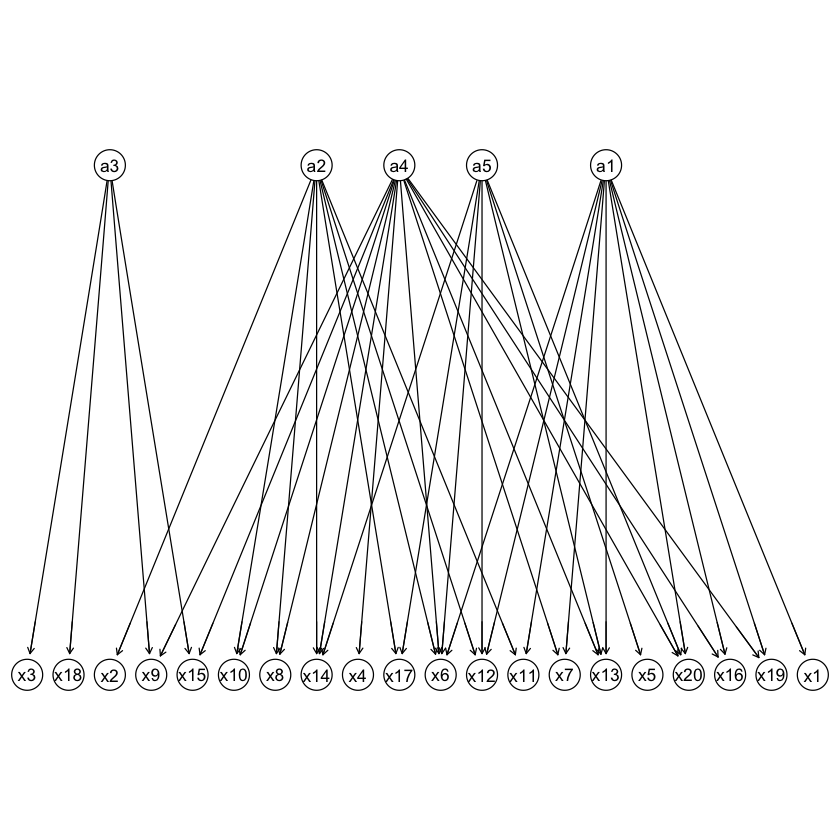

In [58]:
library(Rgraphviz)
graphviz.plot(a)

In [59]:
colnames(QMat)<- c("a1", "a2", "a3", "a4", "a5")
rownames(QMat) <- c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20")
itemnames <- rownames(QMat)
itemcomb <- t(combn(itemnames,2))

In [44]:
skills <- colnames(QMat)

In [45]:
QMat

,a1,a2,a3,a4,a5
,<int>,<int>,<int>,<int>,<int>
x1,1,0,0,0,0
x2,0,1,0,0,0
x3,0,0,1,0,0
x4,0,0,0,1,0
x5,0,0,0,0,1
x6,1,1,0,1,1
x7,1,0,0,1,0
x8,0,1,0,1,0
x9,0,0,1,1,0


In [60]:
indicator <- as.logical(QMat["x6",] * QMat["x11",])

In [61]:
QMat[itemcomb[1,][1],]

,a1,a2,a3,a4,a5
,<int>,<int>,<int>,<int>,<int>
x1,1,0,0,0,0


In [13]:
skills[indicator]

[1] "a1" "a2"

In [68]:
itemcomb[1,]

[1] "x1" "x2"

In [69]:
indc <- as.logical(QMat[itemcomb[1,][1],] * QMat[itemcomb[1,][2],])
indc

[1] FALSE FALSE FALSE FALSE FALSE

In [67]:
skills[indc]

character(0)

In [48]:
tmp <- ci.test(itemcomb[1,][1], itemcomb[1,][2],skills[indc], test = "x2",data=factoreddata)

In [49]:
nrow(itemcomb)

[1] 190

In [75]:
cntr = 0 
for (i in 1:nrow(itemcomb)){
    indc <- as.logical(QMat[itemcomb[i,][1],] * QMat[itemcomb[i,][2],])
    tmp <- ci.test(itemcomb[i,][1], itemcomb[i,][2],skills[indc], 
                    test = "x2", data=factoreddata)
    if(tmp$p.val > 0.05){
        cntr <- cntr + 1 
    }
}

In [76]:
cntr

[1] 172

In [20]:
newd <- rbn(a, n=1000, data=factoreddata)

Warning message in rbn.bn(a, n = 1000, data = factoreddata):
“the rbn.bn() method is deprecated and will be removed in 2023.”


In [21]:
cntr = 0 
for (i in 1:nrow(itemcomb)){
    indc <- as.logical(QMat[itemcomb[i,][1],] * QMat[itemcomb[i,][2],])
    tmp <- ci.test(itemcomb[i,][1], itemcomb[i,][2],skills[indc], 
                    test = "x2", data=newd)
    if(tmp$p.val > 0.05){
        cntr <- cntr + 1 
    }
}
cntr

[1] 182

In [22]:
X <- simdat$dat

In [23]:
colnames(X) <-c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20")

In [24]:
X <- as.data.frame(X)

In [25]:
chisq.test(table(X$x3, X$x18))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(X$x3, X$x18)
X-squared = 32.539, df = 1, p-value = 1.168e-08


In [31]:
ci.test("x3","x18",data = factoreddata, test = "x2")


	Pearson's X^2

data:  x3 ~ x18  
x2 = 33.265, df = 1, p-value = 8.042e-09
alternative hypothesis: true value is greater than 0
